# Bertrand paradox

### First method

Choose to random points in a (unit) circle and calculate the length of that chord.

In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
def length(x1, y1, x2, y2):
	return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [68]:
def chord1(r=1):
	theta = np.random.uniform(0, 2*np.pi)
	return r*np.cos(theta), r*np.sin(theta)

In [69]:
def check_len(l1, r=1):
	# Length of the inscribed triangle
	l2 = r*np.sqrt(3) 
	if l1 >= l2:
		return 1 
	else:
		return 0 

In [94]:
def mid_point(x1, y1, x2, y2):
	return [(x1+x2)/2, (y1+y2)/2]

In [70]:
avg = 0
n1 = int(1e6)
for i in range(n1):
	x1, y1 = chord1()
	x2, y2 = chord1()

	avg += check_len(length(x1, y1, x2, y2))

avg /= n 
print(avg) 	# aprox 1/3

0.333845


In [105]:
# Saving data for plot
n_plot = 100000
# Chords shorter than the side of the inscribed triangle
x1, y1 = [], []
x2, y2 = [], []

# Chords longer than the side of the inscribed triangle
a1, b1 = [], []
a2, b2 = [], []

# Midpoints of the chords
mids = []

for i in range(n_plot):
	temp_x1, temp_y1 = chord1()
	temp_x2, temp_y2 = chord1()

	mids.append(mid_point(temp_x1, temp_y1, temp_x2, temp_y2))
	
	if check_len(length(temp_x1, temp_y1, temp_x2, temp_y2)):
		a1.append(temp_x1)
		b1.append(temp_y1)
		a2.append(temp_x2)
		b2.append(temp_y2)
	else:
		x1.append(temp_x1)
		y1.append(temp_y1)
		x2.append(temp_x2)
		y2.append(temp_y2)



In [103]:
# Append x and y values intercalated
x_short = []
y_short = []
for i in range(len(x1)):
	x_short.append(x1[i])
	x_short.append(x2[i])
	y_short.append(y1[i])
	y_short.append(y2[i])	

x_long = []
y_long = []
for i in range(len(a1)):
	x_long.append(a1[i])
	x_long.append(a2[i])
	y_long.append(b1[i])
	y_long.append(b2[i])

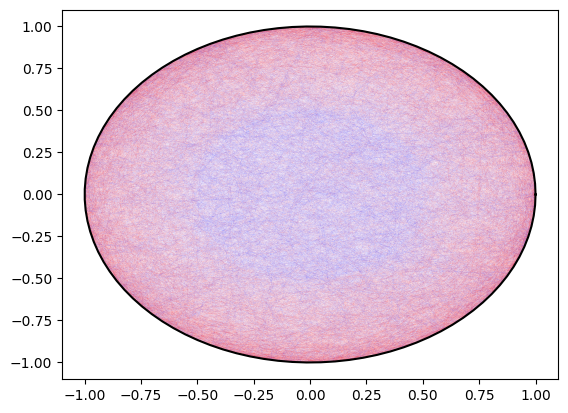

In [85]:
# PLotting the chords
theta = np.linspace(0, 2*np.pi, 100)
x = np.cos(theta)
y = np.sin(theta)

plt.plot(x_short, y_short, color='red', linewidth=0.005)
plt.plot(x_long, y_long, color='blue', linewidth=0.005)
plt.plot(x, y, 'k')

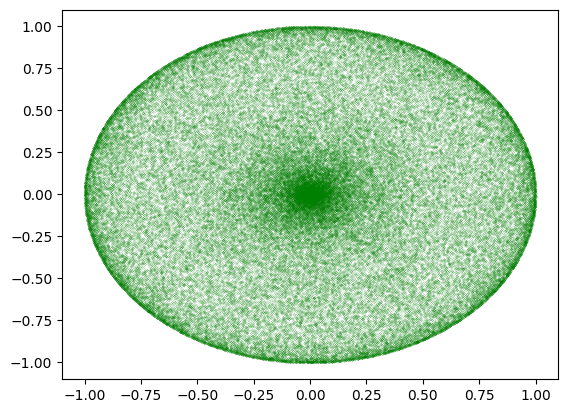

In [107]:
# PLotting the midpoints
plt.scatter([i[0] for i in mids], [i[1] for i in mids], color='green', s=0.01)

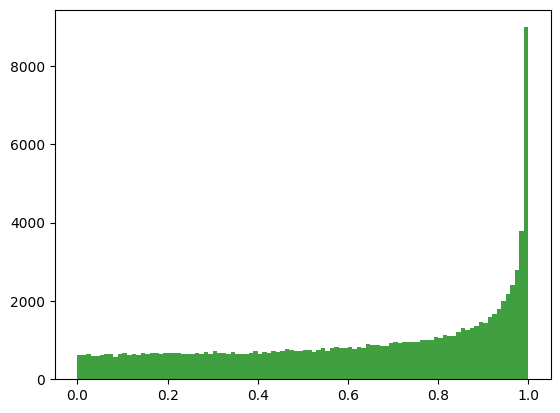

In [129]:
# Midpoints distribution
module = [np.sqrt(i[0]**2 + i[1]**2) for i in mids]
plt.hist(module, bins=100, density=True color='green', alpha=0.75)
plt.show()